### Summary
This notebook will explore the basketball positions for all NBA players, then use supervised machine learning to predict positions - both 3 traditional positions and 5 modern positions

## Introduction
The five basketball positions normally employed by organized basketball teams are the point guard (PG), shooting guard (SG), small forward (SF), power forward (PF), and center (C).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set_style('whitegrid')
from bs4 import BeautifulSoup, SoupStrainer
import sys, string, requests, datetime, time
%matplotlib inline

Preview table:

In [2]:
players = pd.read_csv('Tables/players.csv') # this csv file is taken from web scraped data from Baskeball-Reference
players.head()

,name,active_from,active_to,career_length,birth_date,position,trad_position,ppg,trb,ast,...,ws,height_inches,weight,shooting_hand,hof,college,hs_name,hs_city,hs_state,url
0,Alaa Abdelnaby,1990,1995,5,1968-06-24,Power Forward,Forward,5.7,3.3,0.3,...,4.8,82.0,240.0,Right,0.0,Duke University,Bloomfield,Bloomfield,New Jersey,/players/a/abdelal01.html
1,Zaid Abdul-Aziz,1968,1978,10,1946-04-07,Center,Center,9.0,8.0,1.2,...,17.5,81.0,235.0,Right,0.0,Iowa State University,John Jay,Brooklyn,New York,/players/a/abdulza01.html
2,Kareem Abdul-Jabbar,1969,1989,20,1947-04-16,Center,Center,24.6,11.2,3.6,...,273.4,86.0,225.0,Right,1.0,"University of California, Los Angeles",Power Memorial,New York,New York,/players/a/abdulka01.html
3,Mahmoud Abdul-Rauf,1990,2001,11,1969-03-09,Point Guard,Guard,14.6,1.9,3.5,...,25.2,73.0,162.0,Right,0.0,Louisiana State University,Gulfport,Gulfport,Mississippi,/players/a/abdulma02.html
4,Tariq Abdul-Wahad,1997,2003,6,1974-11-03,Shooting Guard,Guard,7.8,3.3,1.1,...,3.5,78.0,223.0,Right,0.0,"University of Michigan, San Jose State University",Lycee Aristide Briand,Evreux,France,/players/a/abdulta01.html


## Data visualization

### Individual statistics

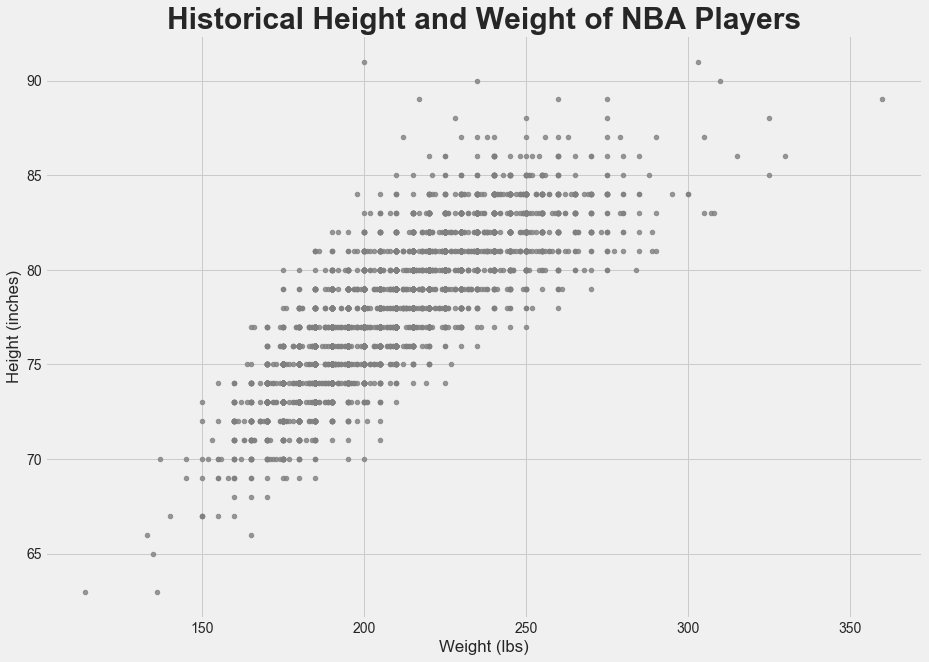

In [3]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,10))

ax = sns.regplot(x='weight', y='height_inches', data=players, 
                 color='grey', fit_reg=False, scatter_kws={"s": 20})

ax.set(xlabel='Weight (lbs)', ylabel='Height (inches)')
plt.title('Historical Height and Weight of NBA Players', fontsize=30, fontweight="bold")

plt.savefig('all-graphs/height_weight.png')

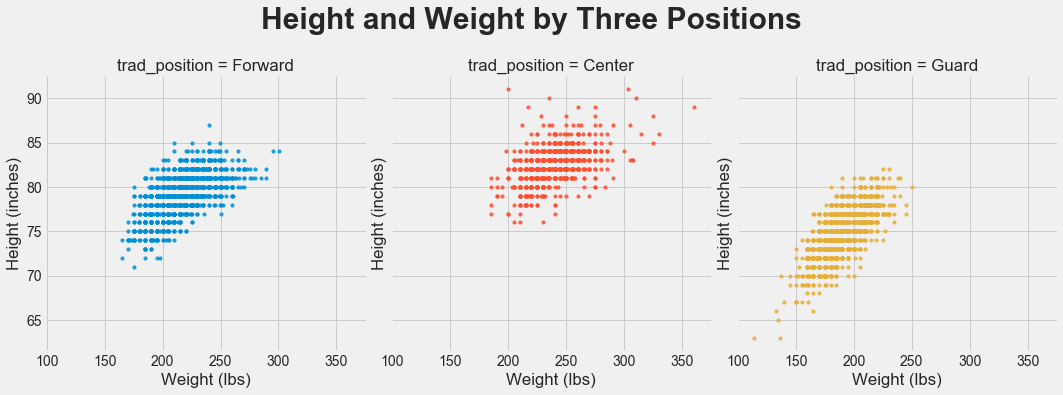

In [39]:
plt.style.use('fivethirtyeight')

three_order = ['Guard', 'Forward', 'Center']
ax = sns.lmplot(x="weight", y="height_inches", data=players, 
               col='trad_position', hue='trad_position',
               x_jitter=.1, fit_reg=False, scatter_kws={"s": 10})

ax.set(xlabel='Weight (lbs)', ylabel='Height (inches)')
plt.suptitle('Height and Weight by Three Positions', fontsize=30, fontweight="bold", y=1.1)

plt.savefig('all-graphs/height_weight_3pos.png', bbox_inches='tight')

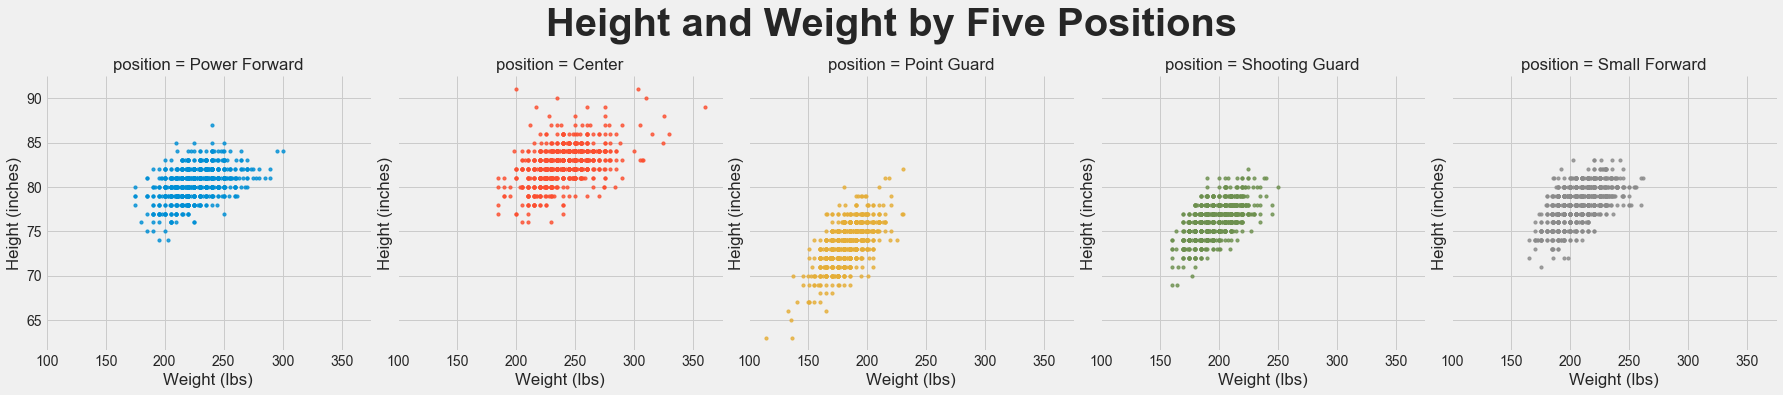

In [40]:
plt.style.use('fivethirtyeight')

ax = sns.lmplot(x="weight", y="height_inches", data=players, 
               col='position', hue='position',
               x_jitter=.1, fit_reg=False, scatter_kws={"s": 10})

ax.set(xlabel='Weight (lbs)', ylabel='Height (inches)')
plt.suptitle('Height and Weight by Five Positions', fontsize=40, fontweight="bold", y=1.1)

plt.savefig('all-graphs/height_weight_5pos.png', bbox_inches='tight')

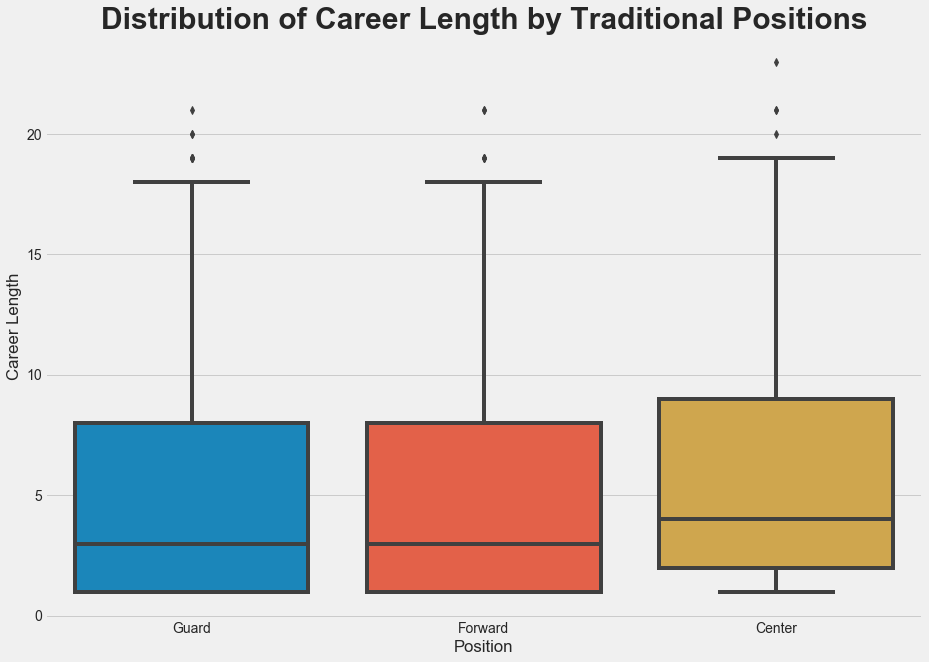

In [41]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,10))

three_order = ['Guard', 'Forward', 'Center']
sns.boxplot(x='trad_position', y='career_length', data=players, order=three_order)
plt.title('Distribution of Career Length by Traditional Positions', fontsize=30, fontweight="bold")
plt.xlabel('Position'), 
plt.ylabel('Career Length')

plt.savefig('all-graphs/career_lenth_3pos.png', bbox_inches='tight')

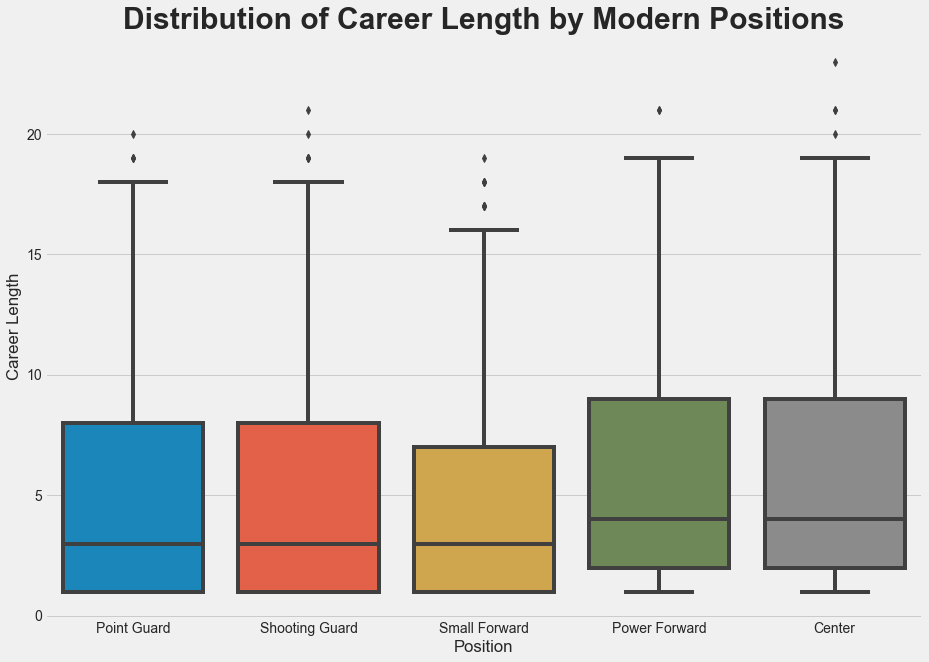

In [42]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,10))

five_order = ['Point Guard', 'Shooting Guard', 'Small Forward', 'Power Forward', 'Center']
sns.boxplot(x='position', y='career_length', data=players, order=five_order)
plt.title('Distribution of Career Length by Modern Positions', fontsize=30, fontweight="bold")
plt.xlabel('Position'), 
plt.ylabel('Career Length')

plt.savefig('all-graphs/career_lenth_5pos.png', bbox_inches='tight')

In [43]:
players.groupby('position').count()['trad_position'].sort_values()

position
Center             812
Power Forward      864
Point Guard        973
Shooting Guard     987
Small Forward     1048
Name: trad_position, dtype: int64

In [44]:
players.groupby('position').count().reindex(five_order)

,name,active_from,active_to,career_length,birth_date,trad_position,ppg,trb,ast,fgp,...,ws,height_inches,weight,shooting_hand,hof,college,hs_name,hs_city,hs_state,url
position,,,,,,,,,,,,,,,,,,,,,
Point Guard,973,973,973,973,969,973,973,848,973,968,...,972,973,971,973,973,933,851,850,851,973
Shooting Guard,987,987,987,987,983,987,987,987,987,985,...,987,987,987,987,987,944,900,900,900,987
Small Forward,1048,1048,1048,1048,1034,1048,1048,949,1048,1039,...,1046,1048,1047,1048,1048,984,871,871,871,1048
Power Forward,864,864,864,864,860,864,864,837,864,858,...,864,864,864,864,864,810,760,759,760,864
Center,812,812,812,812,810,812,812,771,812,806,...,811,812,810,812,812,700,644,644,644,812


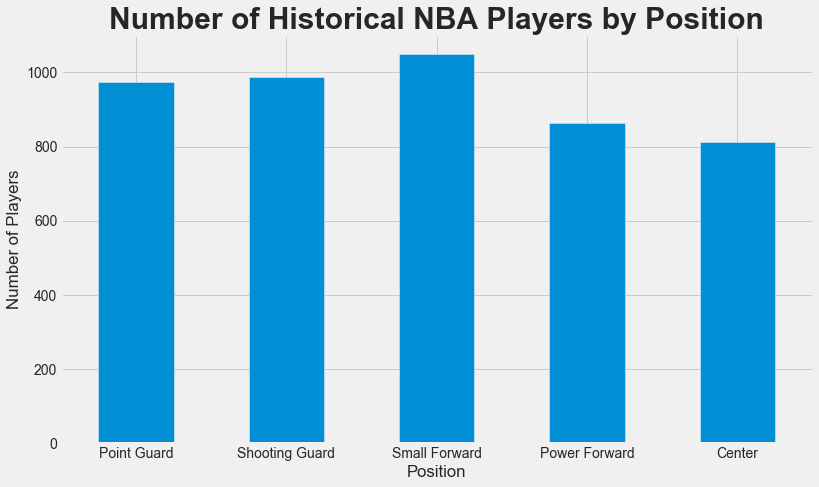

In [45]:
plt.style.use('fivethirtyeight')

ax = players.groupby('position').count().reindex(five_order)['trad_position']
ax = ax.plot.bar(figsize=(12,7), rot=0)
ax.set(xlabel='Position', ylabel='Number of Players')
plt.title('Number of Historical NBA Players by Position', fontsize=30, fontweight="bold")

plt.savefig('all-graphs/num_pos.png')

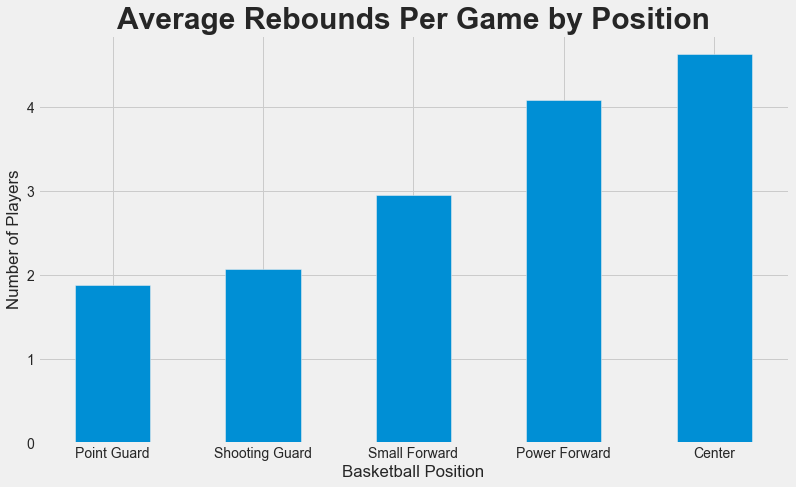

In [11]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,10))

ax = players.groupby('position').mean().reindex(five_order)['trb']
ax = ax.plot.bar(figsize=(12,7), rot=0)
plt.title('Average Rebounds Per Game by Position', fontsize=30, fontweight="bold")
ax.set(xlabel='Basketball Position', ylabel='Number of Players')

plt.savefig('all-graphs/trb_pos.png')

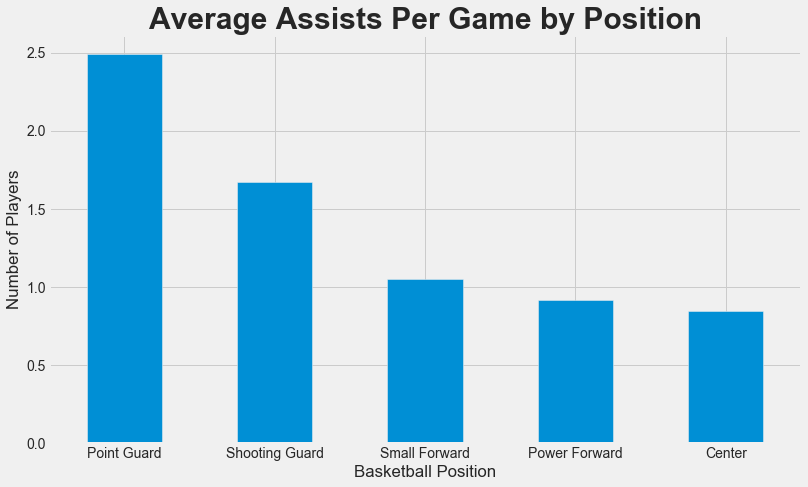

In [12]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,10))

ax = players.groupby('position').mean().reindex(five_order)['ast']
ax = ax.plot.bar(figsize=(12,7), rot=0)
plt.title('Average Assists Per Game by Position', fontsize=30, fontweight="bold")
ax.set(xlabel='Basketball Position', ylabel='Number of Players')

plt.savefig('all-graphs/ast_pos.png')

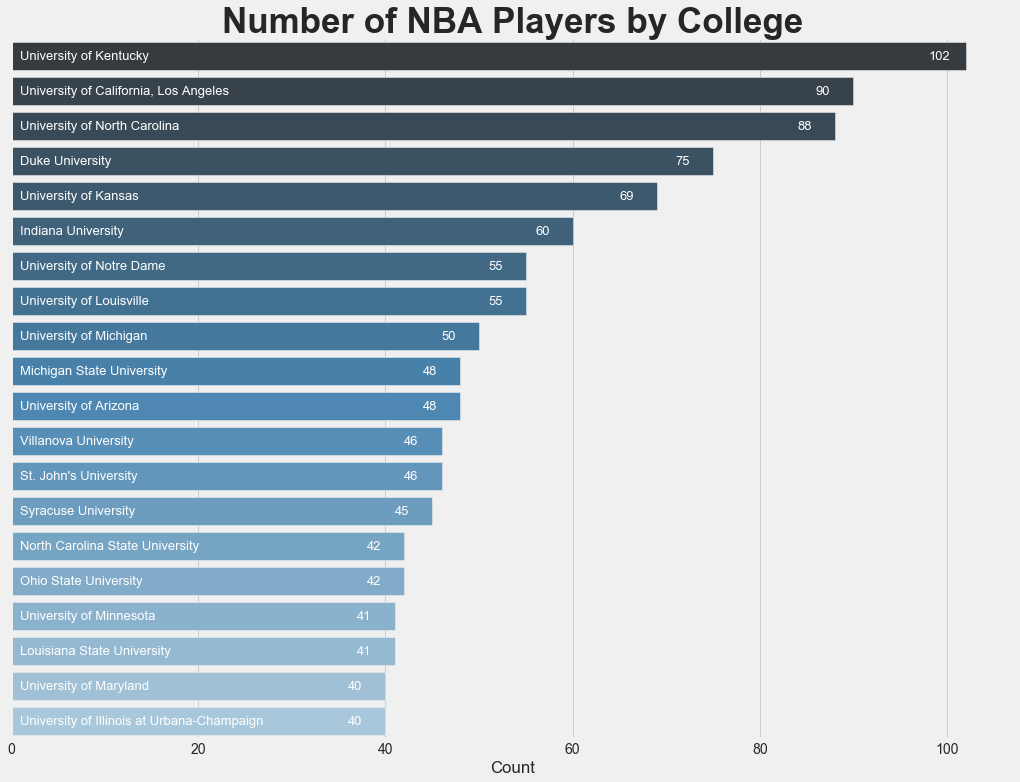

In [13]:
plt.style.use('fivethirtyeight')

top_colleges = players['college'].value_counts()[:20]
top_colleges_df = pd.DataFrame(top_colleges)
top_colleges_df.columns = ['Count']

plt.figure(figsize=(16,12))
sns.barplot(x='Count', y=top_colleges_df.index, data=top_colleges_df, palette="Blues_d")
plt.title('Number of NBA Players by College', fontsize=35, fontweight='bold')
plt.gca().set_yticks([]);

for num in range(len(top_colleges)):
    plt.text(top_colleges[num]-4, num, top_colleges[num], color='white', size=13, verticalalignment='center')
    plt.text(1, num, top_colleges.index[num], color='white', size=13, verticalalignment='center')
    
plt.savefig('all-graphs/top_colleges.png')

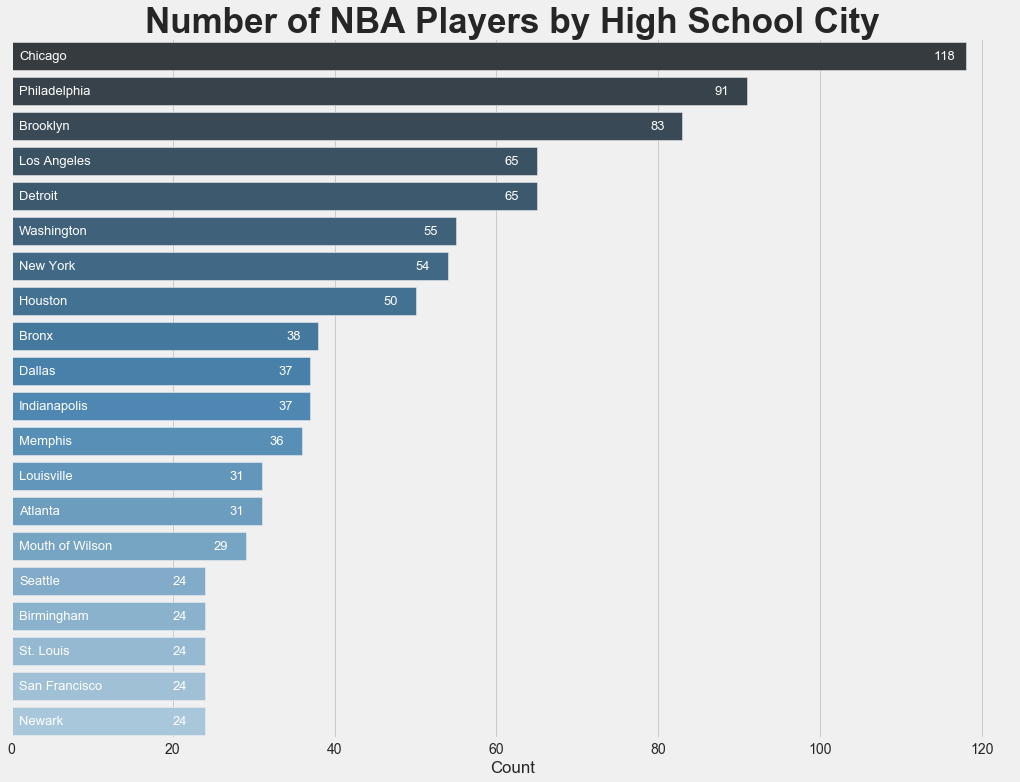

In [14]:
plt.style.use('fivethirtyeight')

top_hs_cities = players['hs_city'].value_counts()[:20]
top_hs_cities_df = pd.DataFrame(top_hs_cities)
top_hs_cities_df.columns = ['Count']

plt.figure(figsize=(16,12))
sns.barplot(x='Count', y=top_hs_cities_df.index, data=top_hs_cities_df, palette="Blues_d")
plt.title('Number of NBA Players by High School City', fontsize=35, fontweight="bold")
plt.gca().set_yticks([]);

for num in range(len(top_hs_cities)):
    plt.text(top_hs_cities[num]-4, num, top_hs_cities[num], color='white', size=13, verticalalignment='center')
    plt.text(1, num, top_hs_cities.index[num], color='white', size=13, verticalalignment='center')
    
plt.savefig('all-graphs/top_hs_city.png')

## Model data for Machine Learning regression

In [15]:
players_feat = players[['active_from', 'active_to', 'position', 'trad_position', 
                        'ppg', 'trb', 'ast', 'fgp', 'per', 'ws', 'height_inches', 'weight']].copy()
players_feat.head()

,active_from,active_to,position,trad_position,ppg,trb,ast,fgp,per,ws,height_inches,weight
0,1990,1995,Power Forward,Forward,5.7,3.3,0.3,50.2,13.0,4.8,82.0,240.0
1,1968,1978,Center,Center,9.0,8.0,1.2,42.8,15.1,17.5,81.0,235.0
2,1969,1989,Center,Center,24.6,11.2,3.6,55.9,24.6,273.4,86.0,225.0
3,1990,2001,Point Guard,Guard,14.6,1.9,3.5,44.2,15.4,25.2,73.0,162.0
4,1997,2003,Shooting Guard,Guard,7.8,3.3,1.1,41.7,11.4,3.5,78.0,223.0


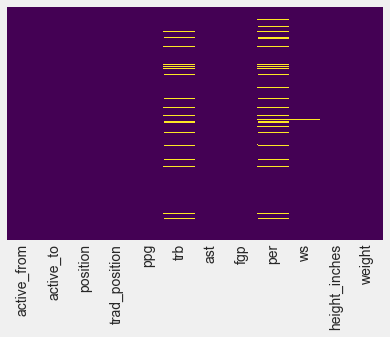

In [16]:
sns.heatmap(players_feat.isnull(), yticklabels=False, cbar=False, cmap='viridis')

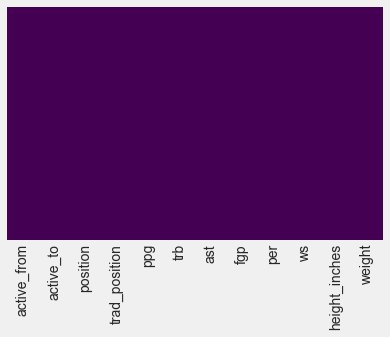

In [17]:
players_feat = players_feat.dropna() # delete rows with NaN values
sns.heatmap(players_feat.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Model data for Machine Learning regression

### Modern Five Positions

In [61]:
from sklearn.model_selection import train_test_split

X = players_feat[['active_to', 'active_from', 'ppg', 'trb', 'ast', 'fgp', 'per', 'ws', 'height_inches', 'weight']]
y = players_feat['position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<font color='blue'>Logistic Regression Model</font>

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


logmodel = LogisticRegression(solver='liblinear', multi_class='auto')
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print('accuracy Score: ', accuracy_score(y_test, predictions))   

                precision    recall  f1-score   support

        Center       0.72      0.86      0.79       225
   Point Guard       0.74      0.75      0.74       259
 Power Forward       0.59      0.47      0.53       240
Shooting Guard       0.57      0.69      0.63       282
 Small Forward       0.63      0.50      0.56       288

     micro avg       0.65      0.65      0.65      1294
     macro avg       0.65      0.66      0.65      1294
  weighted avg       0.65      0.65      0.64      1294



[[194   0  23   0   8]
 [  0 195   1  58   5]
 [ 68   0 114   3  55]
 [  0  69   3 194  16]
 [  7   1  52  83 145]]


accuracy Score:  0.6506955177743431


<font color='blue'>Decision Tree Classifier</font>

In [68]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print('accuracy Score: ', accuracy_score(y_test, predictions))   

                precision    recall  f1-score   support

        Center       0.72      0.72      0.72       225
   Point Guard       0.72      0.61      0.66       259
 Power Forward       0.48      0.51      0.50       240
Shooting Guard       0.54      0.61      0.57       282
 Small Forward       0.51      0.50      0.51       288

     micro avg       0.59      0.59      0.59      1294
     macro avg       0.60      0.59      0.59      1294
  weighted avg       0.59      0.59      0.59      1294



[[163   0  50   0  12]
 [  0 159   2  90   8]
 [ 49   0 122   4  65]
 [  0  56   4 171  51]
 [ 14   6  74  50 144]]


accuracy Score:  0.5865533230293664


<font color='blue'>Naive Bayse Classifier</font>

In [69]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print('accuracy Score: ', accuracy_score(y_test, predictions))  

                precision    recall  f1-score   support

        Center       0.72      0.63      0.67       225
   Point Guard       0.75      0.69      0.72       259
 Power Forward       0.47      0.54      0.50       240
Shooting Guard       0.57      0.62      0.60       282
 Small Forward       0.57      0.55      0.56       288

     micro avg       0.60      0.60      0.60      1294
     macro avg       0.62      0.61      0.61      1294
  weighted avg       0.61      0.60      0.61      1294



[[142   0  72   0  11]
 [  0 178   1  75   5]
 [ 44   0 129   2  65]
 [  2  59   9 175  37]
 [ 10   1  66  53 158]]


accuracy Score:  0.6043276661514683


<font color='blue'>Support Vector Machine Classifier</font>

In [71]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))
print('\n')
print('accuracy Score: ', accuracy_score(y_test, predictions))  

C:\Users\ymeri\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


                precision    recall  f1-score   support

        Center       0.50      0.04      0.08       225
   Point Guard       0.60      0.07      0.12       259
 Power Forward       0.44      0.10      0.17       240
Shooting Guard       0.23      0.87      0.37       282
 Small Forward       0.53      0.23      0.32       288

     micro avg       0.28      0.28      0.28      1294
     macro avg       0.46      0.26      0.21      1294
  weighted avg       0.46      0.28      0.22      1294



[[ 10   0  15 196   4]
 [  0  18   0 238   3]
 [  7   0  25 181  27]
 [  0  11   2 246  23]
 [  3   1  15 204  65]]


accuracy Score:  0.28129829984544047


### Traditional Three Positions

In [23]:
X = players_feat[['active_to', 'active_from', 'ppg', 'trb', 'ast', 'fgp', 'per', 'ws', 'height_inches', 'weight']]
y = players_feat['trad_position']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<font color='blue'>Logistic Regression Model</font>

In [72]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='liblinear', multi_class='auto')
logmodel.fit(X_train, y_train)
predictions = logmodel.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

                precision    recall  f1-score   support

        Center       0.72      0.86      0.79       225
   Point Guard       0.74      0.75      0.74       259
 Power Forward       0.59      0.47      0.53       240
Shooting Guard       0.57      0.69      0.63       282
 Small Forward       0.63      0.50      0.56       288

     micro avg       0.65      0.65      0.65      1294
     macro avg       0.65      0.66      0.65      1294
  weighted avg       0.65      0.65      0.64      1294



[[194   0  23   0   8]
 [  0 195   1  58   5]
 [ 68   0 114   3  55]
 [  0  69   3 194  16]
 [  7   1  52  83 145]]


<font color='blue'>Decision Tree Classifier</font>

In [73]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

                precision    recall  f1-score   support

        Center       0.74      0.71      0.73       225
   Point Guard       0.71      0.61      0.65       259
 Power Forward       0.50      0.51      0.50       240
Shooting Guard       0.53      0.60      0.56       282
 Small Forward       0.51      0.52      0.51       288

     micro avg       0.59      0.59      0.59      1294
     macro avg       0.60      0.59      0.59      1294
  weighted avg       0.59      0.59      0.59      1294



[[160   0  50   0  15]
 [  0 157   1  88  13]
 [ 46   0 122   5  67]
 [  0  60   4 168  50]
 [ 10   4  68  56 150]]


<font color='blue'>Naive Bayse Classifier</font>

In [74]:
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

                precision    recall  f1-score   support

        Center       0.72      0.63      0.67       225
   Point Guard       0.75      0.69      0.72       259
 Power Forward       0.47      0.54      0.50       240
Shooting Guard       0.57      0.62      0.60       282
 Small Forward       0.57      0.55      0.56       288

     micro avg       0.60      0.60      0.60      1294
     macro avg       0.62      0.61      0.61      1294
  weighted avg       0.61      0.60      0.61      1294



[[142   0  72   0  11]
 [  0 178   1  75   5]
 [ 44   0 129   2  65]
 [  2  59   9 175  37]
 [ 10   1  66  53 158]]


<font color='blue'>Support Vector Machine Classifier</font>

In [75]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)

print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))

C:\Users\ymeri\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


                precision    recall  f1-score   support

        Center       0.50      0.04      0.08       225
   Point Guard       0.60      0.07      0.12       259
 Power Forward       0.44      0.10      0.17       240
Shooting Guard       0.23      0.87      0.37       282
 Small Forward       0.53      0.23      0.32       288

     micro avg       0.28      0.28      0.28      1294
     macro avg       0.46      0.26      0.21      1294
  weighted avg       0.46      0.28      0.22      1294



[[ 10   0  15 196   4]
 [  0  18   0 238   3]
 [  7   0  25 181  27]
 [  0  11   2 246  23]
 [  3   1  15 204  65]]


### Year-by-year statistics

In [28]:
left_hand = []
right_hand = []
height = []
weight = []
ppg = []
trb = []
ast = []


start = players.active_from.min() # 1947 Season
end = players.active_from.max() # 2018 Season

for year in range(start,end):
    active = (players.active_from.values <= year) & (players.active_to >= year) # only include active players
    height.append(np.mean(players[active].height_inches)) # average height in inches
    weight.append(np.mean(players[active].weight)) # average weight in pounds
    left_hand.append(1.0*np.sum(players[active].shooting_hand == 'Left')) # number of left handed shooters
    right_hand.append(1.0*np.sum(players[active].shooting_hand == 'Right')) # number of right handed shooters
    ppg.append(np.mean(players[active].ppg))
    trb.append(np.mean(players[active].trb))
    ast.append(np.mean(players[active].ast))
    
# create a DataFrame with a summary
stats_year = pd.DataFrame({'season': np.arange(start,end), 
                          'height': height,
                          'weight': weight,
                          'left_hand': left_hand,
                          'right_hand': right_hand,
                          'ppg': ppg,
                          'trb': trb,
                          'ast': ast}).set_index('season')

# preview
stats_year.head()

,height,weight,left_hand,right_hand,ppg,trb,ast
season,,,,,,,
1946,74.322981,188.656250,4.0,157.0,5.047205,3.791304,0.745963
1947,74.323383,187.815000,4.0,197.0,5.072637,3.671875,0.815423
1948,74.875000,189.855072,7.0,201.0,6.252404,3.974603,1.264904
1949,75.164983,190.996610,8.0,289.0,6.462290,4.040650,1.528620
1950,75.450980,192.055336,6.0,249.0,7.030980,3.984314,1.708627


The per-season figures reflect the average statistical value for players who were active that year. It assumes that every player had a consistent height and weight for their entire careers, which is unlikely since players tend to be shortest/lightest their rookie years. It also assumes that players did not switch their shooting hands during their careers.

We can get more detailed season averages on [this page](http://en.wikipedia.org "Basketball Reference"), but for the purpose of this exercise we will use career averages for players active in each season

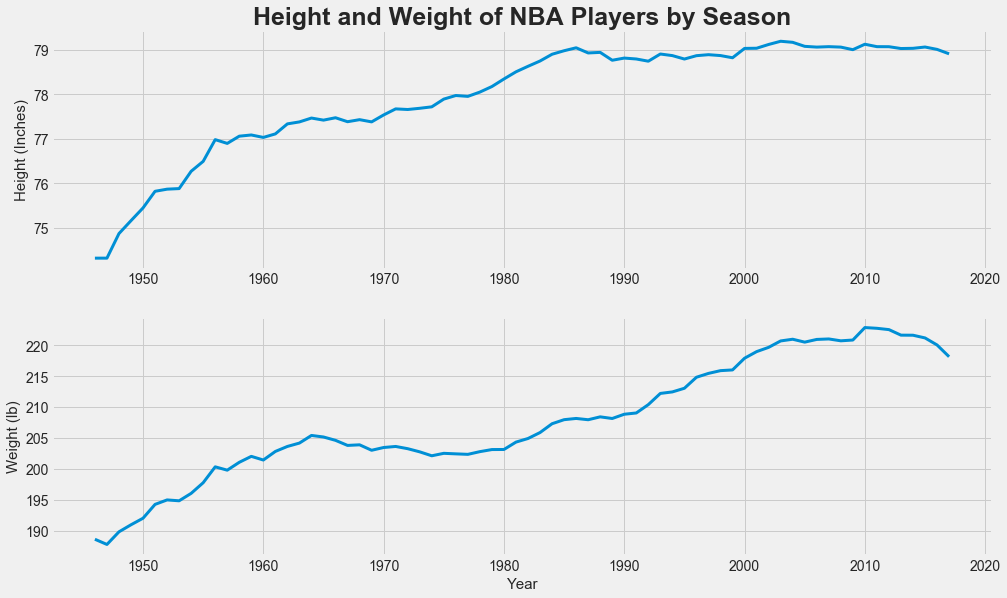

In [29]:
plt.style.use('fivethirtyeight')

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(15,9))

plt.subplot(2, 1, 1)
plt.title('Height and Weight of NBA Players by Season', fontsize = 25, fontweight='bold')
plt.plot(stats_year['height'], linewidth=3.0)
plt.ylabel("Height (Inches)", fontsize=15)

plt.subplot(2, 1, 2)
plt.plot(stats_year['weight'], linewidth=3.0)
plt.ylabel('Weight (lb)', fontsize=15)
plt.xlabel('Year', fontsize=15)

plt.savefig('all-graphs/yoy_weight_weight.png')

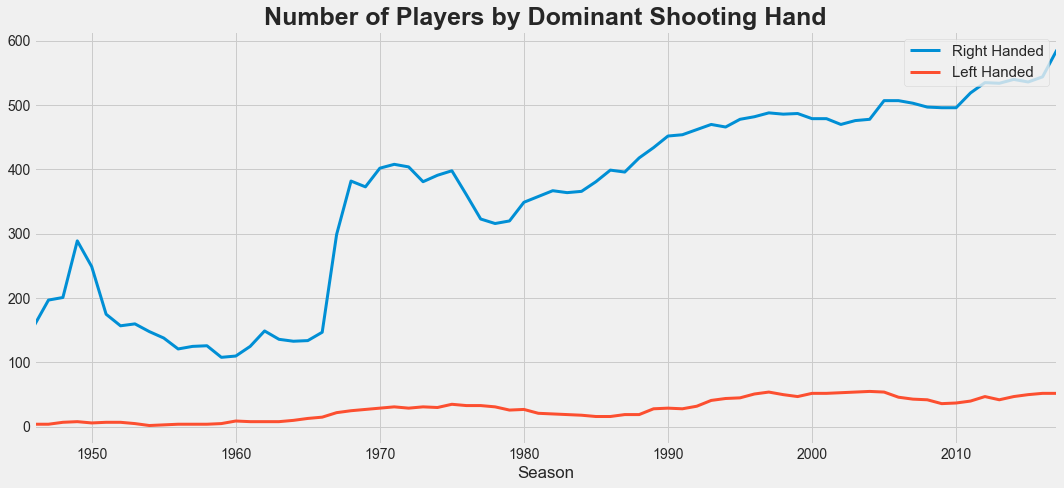

In [30]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14,7))

stats_year['right_hand'].plot(figsize=(15,7), label='Right Handed', linewidth=3.0)
stats_year['left_hand'].plot(label='Left Handed', linewidth=3.0)

plt.legend(loc=1, frameon=True, prop={'size': 15})
plt.xlabel("Season")
plt.title('Number of Players by Dominant Shooting Hand', fontsize = 25, fontweight='bold')

plt.tight_layout()

plt.savefig('all-graphs/yoy_left_right.png')

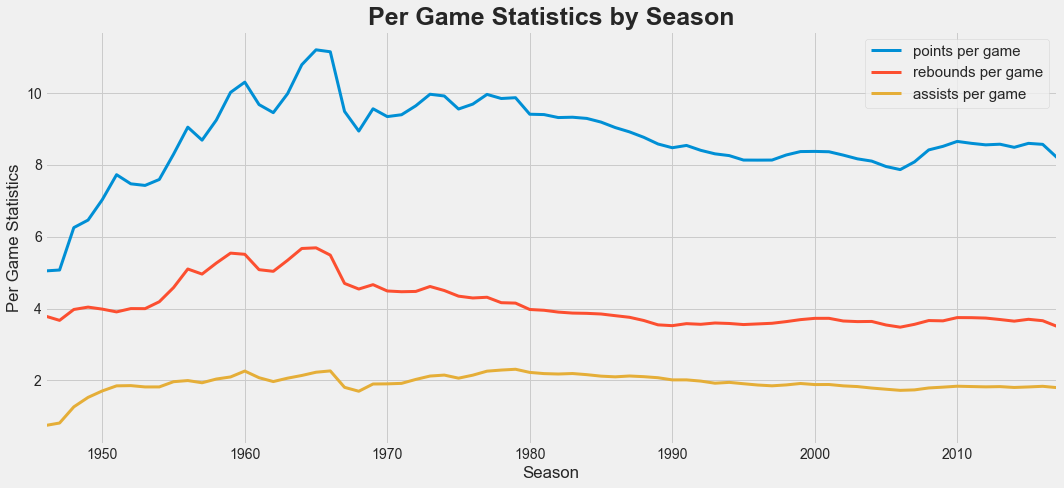

In [31]:
plt.style.use('fivethirtyeight')

stats_year['ppg'].plot(figsize=(15,7), label='points per game', linewidth=3.0)
stats_year['trb'].plot(label='rebounds per game', linewidth=3.0)
stats_year['ast'].plot(label='assists per game', linewidth=3.0)

plt.legend(loc=1, frameon=True, prop={'size': 15})
plt.xlabel("Season")
plt.ylabel("Per Game Statistics")
plt.title('Per Game Statistics by Season', fontsize = 25, fontweight='bold')

plt.tight_layout()

plt.savefig('all-graphs/yoy_ppg_trb_ast.png')

### Predicting Height by year

In [32]:
X = stats_year.drop('height', axis=1)
y = stats_year['height']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<font color='blue'>Linear Regression Model</font>

In [33]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print("R2 Score: ", lm.score(X_test, y_test))

R2 Score:  0.959262855673412


In [34]:
predictions

array([77.56284973, 77.33283568, 79.33278193, 77.96046211, 76.6144301 ,
       76.35628001, 78.83486564, 79.03696235, 79.00372398, 74.989759  ,
       78.6685314 , 76.49219415, 77.82093795, 77.15694751, 78.61996579,
       77.09451143, 79.06043574, 79.32509996, 77.06265407, 78.72198157,
       76.39987067, 79.12361511])

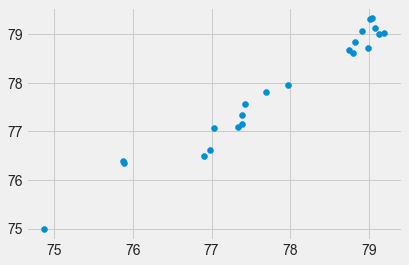

In [35]:
plt.scatter(y_test, predictions) ## y_test contains the contain ppg averages year-by-year

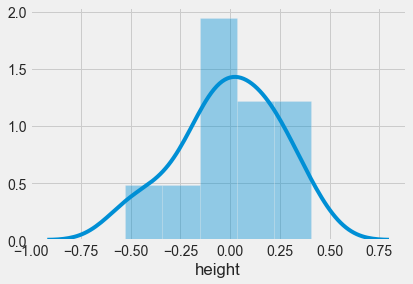

In [36]:
sns.distplot(y_test - predictions) # histogram of the residuals